<a href="https://colab.research.google.com/github/JoodAlk/IT326-DataMiningProject/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phase 1:**

The goal of collecting this dataset :

The goal is to explore how AI and automation are influencing employment across different industries by using two main approaches. First, classification techniques will be employed to group job roles based on their level of AI adoption (e.g., low, medium, high), helping to reveal trends in which types of jobs are embracing AI the most. Second, clustering methods will assess automation risks across industries, identifying sectors most vulnerable to automation. By analyzing the automation risk across sectors, the study will highlight which industries are more prone to job displacement due to automation, as well as which ones are more resilient.

This analysis, using 500 job listings, will also examine the impact on salaries, required skills, and job growth projections, providing a well-rounded view of the future job market.

The class label in this dataset is the 'Job_Growth_Projection', which categorizes job roles as either experiencing "Growth" or "Decline" or "Stable". This label represents the expected future trend for each job role and industry, allowing us to analyze which roles are likely to expand or shrink in the coming years.

The source: kaggle link (https://www.kaggle.com/datasets/uom190346a/ai-powered-job-market-insights)


In [4]:
import pandas as pd

file_path = '/content/ai_job_market_insights.csv'

df = pd.read_csv(file_path)
num_attributes = df.shape[1]

attribute_types = df.dtypes

num_objects = df.shape[0]

class_label_name = df.columns[-1]

print(f"Number of attributes: {num_attributes}")
print(f"Type of attributes:\n{attribute_types}")
print(f"Number of objects: {num_objects}")
print(f"Class or label name: {class_label_name}")

print("First 5 lines:")
print(df.head())

print("\nLast 5 lines:")
print(df.tail())

Number of attributes: 10
Type of attributes:
Job_Title                 object
Industry                  object
Company_Size              object
Location                  object
AI_Adoption_Level         object
Automation_Risk           object
Required_Skills           object
Salary_USD               float64
Remote_Friendly           object
Job_Growth_Projection     object
dtype: object
Number of objects: 500
Class or label name: Job_Growth_Projection
First 5 lines:
               Job_Title       Industry Company_Size   Location  \
0  Cybersecurity Analyst  Entertainment        Small      Dubai   
1   Marketing Specialist     Technology        Large  Singapore   
2          AI Researcher     Technology        Large  Singapore   
3          Sales Manager         Retail        Small     Berlin   
4  Cybersecurity Analyst  Entertainment        Small      Tokyo   

  AI_Adoption_Level Automation_Risk     Required_Skills     Salary_USD  \
0            Medium            High        UX/UI Desi

# **Phase 2:**

### **Understanding Our Dataset: A summary**

samples of raw dataset:
                 Job_Title            Industry Company_Size   Location  \
0    Cybersecurity Analyst       Entertainment        Small      Dubai   
1     Marketing Specialist          Technology        Large  Singapore   
2            AI Researcher          Technology        Large  Singapore   
3            Sales Manager              Retail        Small     Berlin   
4    Cybersecurity Analyst       Entertainment        Small      Tokyo   
..                     ...                 ...          ...        ...   
495         Data Scientist  Telecommunications       Medium     Berlin   
496  Cybersecurity Analyst  Telecommunications        Small     London   
497  Cybersecurity Analyst              Energy        Large      Dubai   
498     Operations Manager          Healthcare        Large      Paris   
499             HR Manager       Entertainment       Medium     Berlin   

    AI_Adoption_Level Automation_Risk     Required_Skills     Salary_USD  \
0          

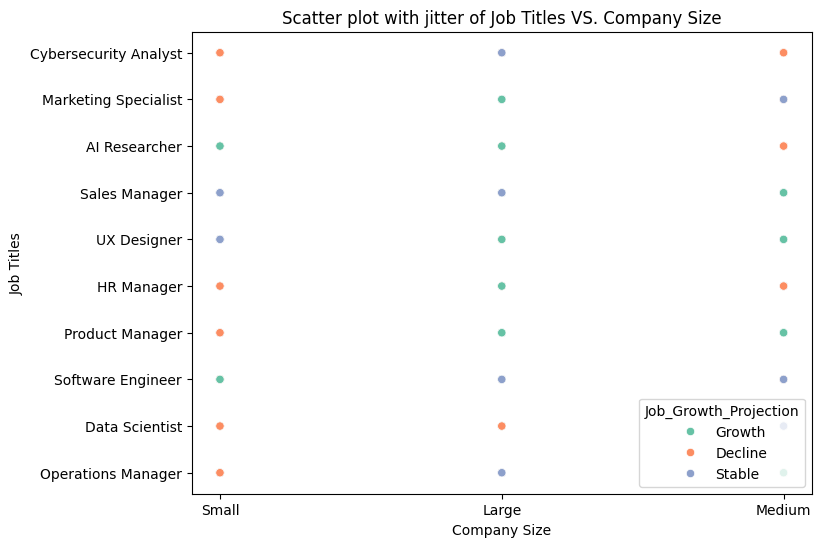

<Figure size 640x480 with 0 Axes>

In [23]:

import matplotlib.pyplot as plt
import seaborn as sns

# 1. samples of raw dataset
df1=pd.DataFrame(df)
print("samples of raw dataset:")
print (df1)

#tables,graphs:(1-varibles distributin 2-missing values 3-statistical summaries)
#2:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#Scatter plot of Job Titles VS. Company Size
plt.figure(figsize=(8,6))
sns.scatterplot(x='Company_Size', y='Job_Title', data=df, hue='Job_Growth_Projection',palette='Set2')
plt.title('Scatter plot with jitter of Job Titles VS. Company Size')
plt.xlabel('Company Size')
plt.ylabel ('Job Titles')
plt.show()
plt.subplots_adjust(hspace=0.5)



This scatter plot shows the distribution of Job Titles across Company Sizes (Small, Medium, Large) with points colored by Job Growth Projection (Growth, Decline, Stable). The jitter effect helps distinguish overlapping points


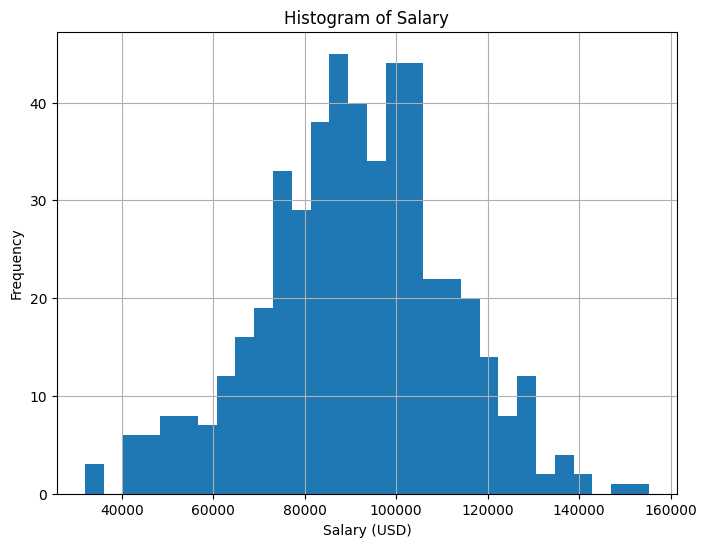

In [24]:

# Histogram for 'Salary_USD'
plt.figure(figsize=(8,6))
df['Salary_USD'].hist(bins=30)
plt.title('Histogram of Salary')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()


This histogram visualizes the distribution of Salaries (USD), showing how frequently different salary ranges occur in the dataset. The x-axis represents salary amounts, and the y-axis shows the frequency of those amounts.


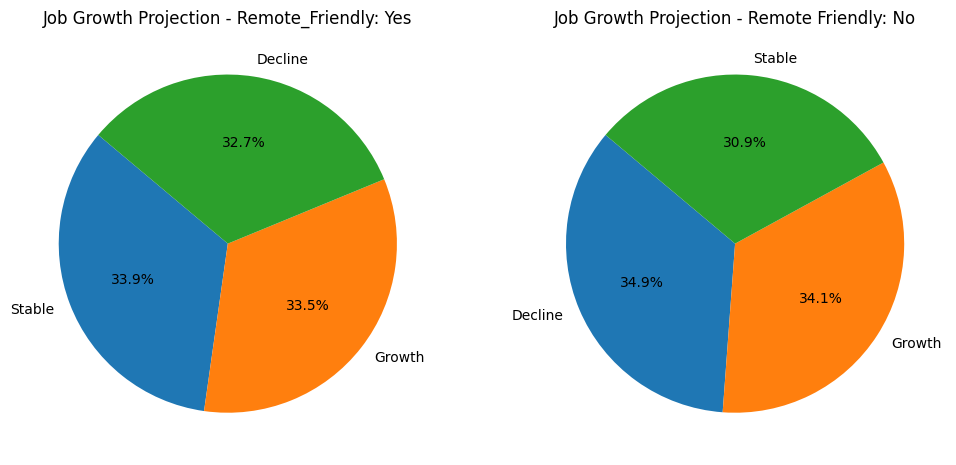

In [25]:
#pie chart Remote Friendly
yes_counts = df[df['Remote_Friendly'] == 'Yes']['Job_Growth_Projection'].value_counts()
no_counts = df[df['Remote_Friendly'] == 'No']['Job_Growth_Projection'].value_counts()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(yes_counts, labels=yes_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Job Growth Projection - Remote_Friendly: Yes')

plt.subplot(1, 2, 2)
plt.pie(no_counts, labels=no_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Job Growth Projection - Remote Friendly: No')
plt.subplots_adjust(hspace=0.5)

plt.show()


This figure presents two pie charts comparing the **Job Growth Projection** for **Remote-Friendly** and **Non-Remote-Friendly** job roles. Each pie chart shows the distribution of job roles categorized as **Growth**, **Decline**, and **Stable**. The left chart represents remote-friendly jobs, while the right chart represents non-remote-friendly jobs. Percentages indicate how each category is distributed within these two groups.

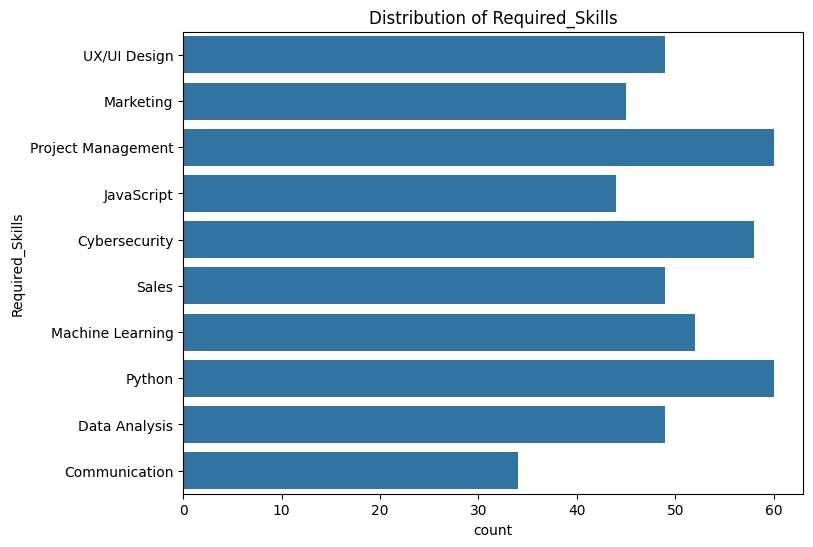

<Figure size 640x480 with 0 Axes>

In [26]:

#bar chart Required_Skills
plt.figure(figsize=(8,6))
sns.countplot(y='Required_Skills',data=df)
plt.title('Distribution of Required_Skills')
plt.show()

plt.subplots_adjust(hspace=0.5)

This horizontal bar chart shows the Distribution of Required Skills, with the x-axis representing the count of occurrences of each skill, and the y-axis listing the required skills in the dataset. It highlights how frequently each skill appears.

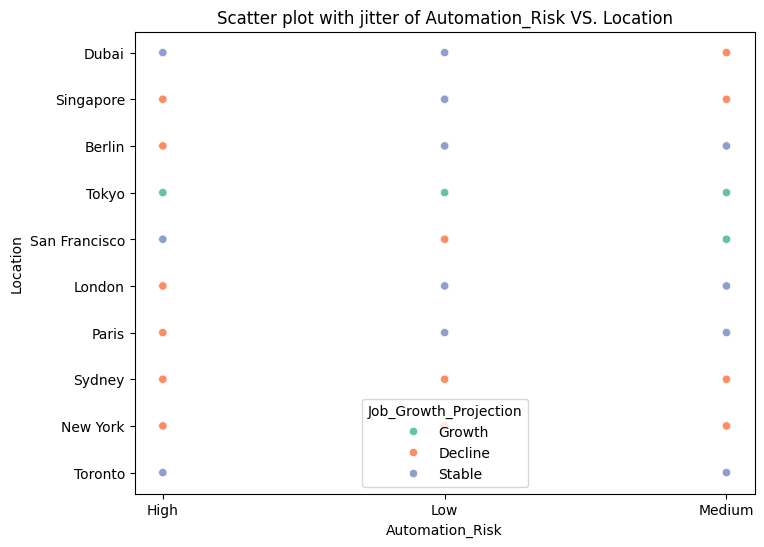

<Figure size 640x480 with 0 Axes>

In [27]:

#Scatter plot with jitter of Location VS. Automation_Risk
plt.figure(figsize=(8,6))
sns.scatterplot(x='Automation_Risk', y='Location', data=df, hue='Job_Growth_Projection',palette='Set2')
plt.title('Scatter plot with jitter of Automation_Risk VS. Location')
plt.ylabel('Location')
plt.xlabel ('Automation_Risk')
plt.show()

plt.subplots_adjust(hspace=0.5)


This scatter plot shows the relationship between **Automation Risk** and **Location**, with points colored by **Job Growth Projection** (Growth, Decline, Stable). The x-axis represents automation risk, and the y-axis shows different locations.

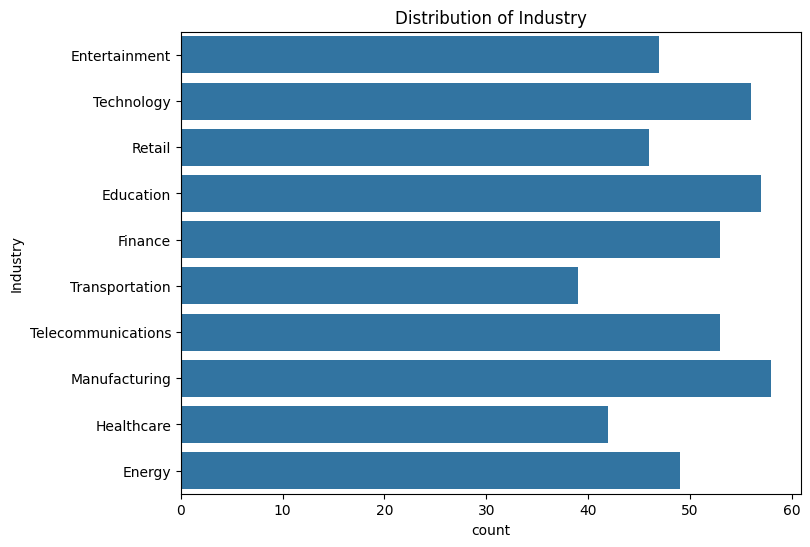

<Figure size 640x480 with 0 Axes>

In [28]:

#bar chart Industry
plt.figure(figsize=(8,6))
sns.countplot(y='Industry',data=df)
plt.title('Distribution of Industry')
plt.show()

plt.subplots_adjust(hspace=0.5)

This horizontal bar chart shows the Distribution of Industry, with the x-axis representing the count of occurrences and the y-axis listing different industries. It highlights how frequently each industry appears in the dataset.

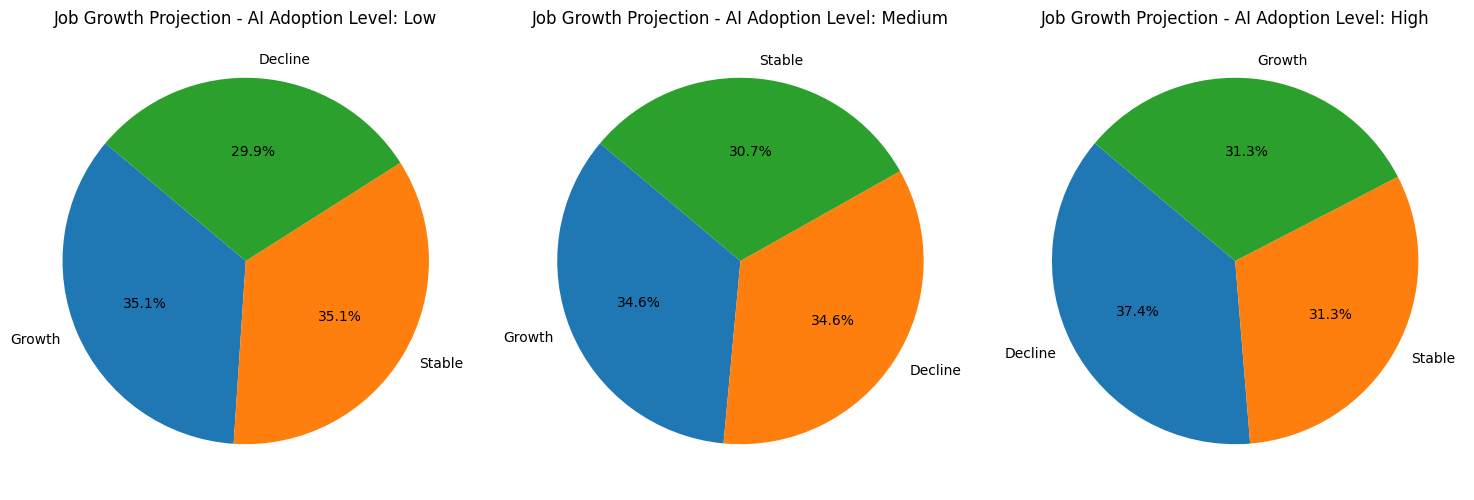

In [29]:
#pie chart Ai_adoption_level
levels = ['Low', 'Medium', 'High']
job_growth_counts = {level: df[df['AI_Adoption_Level'] == level]['Job_Growth_Projection'].value_counts() for level in levels}

plt.figure(figsize=(15, 5))

for i, level in enumerate(levels):
    if level in job_growth_counts:
        plt.subplot(1, 3, i + 1)
        plt.pie(job_growth_counts[level], labels=job_growth_counts[level].index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Job Growth Projection - AI Adoption Level: {level}')
    else:
        print(f"No data for {level}")

plt.tight_layout()
plt.show()


This figure presents three pie charts showing the Job Growth Projection categorized by AI Adoption Level (Low, Medium, High). Each chart displays the proportion of job roles projected to experience Growth, Decline, or remain Stable for different levels of AI adoption. The percentages indicate the distribution of job growth projections within each AI adoption category.

In [30]:
#-------------------------

# 3. Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# 4. Statistical Summary (Mean, Variance, etc.)
print("\nStatistical Summary:")
print(df.describe())

print("\nThe variance:")
var_data=df["Salary_USD"].var()
print(var_data)


Missing values in each column:
Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64

Statistical Summary:
          Salary_USD
count     500.000000
mean    91222.390974
std     20504.291453
min     31969.526346
25%     78511.514863
50%     91998.195286
75%    103971.282092
max    155209.821614

The variance:
420425968.00916165


This output provides a **missing values check** and a **statistical summary** of the **Salary_USD** column. There are no missing values in the dataset, as indicated by the zero counts in each column. The statistical summary includes descriptive statistics such as count, mean, standard deviation, min, max, and quartile values for the salary data. Additionally, the variance of the **Salary_USD** column is shown.

In [31]:
data = pd.read_csv('/content/ai_job_market_insights.csv')

job_growth_values = data['Job_Growth_Projection']

# Count the occurrences of each category
num_growth = job_growth_values[job_growth_values == 'Growth'].count()
num_decline = job_growth_values[job_growth_values == 'Decline'].count()
num_stable = job_growth_values[job_growth_values == 'Stable'].count()

# Calculate the total and percentages
total = num_growth + num_decline + num_stable
percentage_growth = (num_growth / total) * 100
percentage_decline = (num_decline / total) * 100
percentage_stable = (num_stable / total) * 100

# Print the results
print("Number of Growth projections:", num_growth)
print("Number of Decline projections:", num_decline)
print("Number of Stable projections:", num_stable)
print("_")
print("Percentage of Growth projections: {:.2f}%".format(percentage_growth))
print("Percentage of Decline projections: {:.2f}%".format(percentage_decline))
print("Percentage of Stable projections: {:.2f}%".format(percentage_stable))

Number of Growth projections: 169
Number of Decline projections: 169
Number of Stable projections: 162
_
Percentage of Growth projections: 33.80%
Percentage of Decline projections: 33.80%
Percentage of Stable projections: 32.40%


#### **Balanced Data**
The data is balanced and the three classes (Growth, Decline, and Stable) have almost the same number of samples:

- Growth and Decline both make up 33.80% of the data.

- Stable is slightly less at 32.40%, but it’s still very close to the other two.

Because the dataset is balanced, the model won’t favor one class over the others. It means the model will have a fair chance to learn about all three classes equally, and it’s less likely to struggle with predicting the smaller class (Stable).

In short, this balanced dataset makes it easier to train a good model without worrying about bias toward any one class.



---



### **The Application of Preprocessing Techniques**

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('/content/ai_job_market_insights.csv')
df=pd.DataFrame(data)

detect outliners

In [33]:
#In our project analyzing how AI and automation impact employment, we used outlier detection to improve data accuracy

outlier_threshold = 1.5

def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data > upper_bound) | (column_data < lower_bound)
    return sum(outliers)

numeric_columns = data.select_dtypes(include=[np.number]).columns

outlier_counts = {}
total_rows_with_outliers = 0

for column in numeric_columns:
    outliers = count_outliers(data[column])
    outlier_counts[column] = outliers
    total_rows_with_outliers += outliers

total_rows = len(data)

print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")

Outlier Counts:
Salary_USD: 5 rows with outliers
Total Rows with Outliers: 5


We focused on numeric columns, like salaries, calculating the first (Q1)
and third quartiles (Q3) to find the interquartile range (IQR).
We set outlier boundaries at Q3 + 1.5 * IQR (upper) and Q1 - 1.5 * IQR
(lower) and counted the outliers in each numeric column. This process
helps clean the data, ensuring clearer insights into averages like
salaries and enhances the performance of any future machine learning
models. Ultimately, detecting outliers allows us to better understand
trends in the job market influenced by AI and automation.

Removing Outliners

In [34]:
# Calculate the IQR (Interquartile Range)
Q1 = data['Salary_USD'].quantile(0.25) # Calculate the first quartile (25th percentile)
Q3 = data['Salary_USD'].quantile(0.75) # Calculate the third quartile (75th percentile)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
cleaned_data = data[(data['Salary_USD'] >= lower_bound) & (data['Salary_USD'] <= upper_bound)]


# Display the removed rows to understand what was filtered out
removed_rows = data[(data['Salary_USD'] < lower_bound) | (data['Salary_USD'] > upper_bound)]
print("\nRemoved Rows (Outliers):")
print(removed_rows)


Removed Rows (Outliers):
                 Job_Title            Industry Company_Size       Location  \
182         Data Scientist      Transportation        Small       New York   
289         Data Scientist          Healthcare       Medium          Paris   
384  Cybersecurity Analyst  Telecommunications        Large         Berlin   
420   Marketing Specialist             Finance       Medium  San Francisco   
425            UX Designer       Entertainment        Small      Singapore   

    AI_Adoption_Level Automation_Risk Required_Skills     Salary_USD  \
182               Low             Low          Python   31969.526346   
289              High             Low          Python  148467.112346   
384               Low          Medium    UX/UI Design   33601.381360   
420              High            High           Sales  155209.821614   
425            Medium          Medium   Data Analysis   35963.297317   

    Remote_Friendly Job_Growth_Projection  
182             Yes         

In our analysis of salary data, we used the Interquartile Range (IQR) method
to identify and remove outliers from the Salary_USD column. First, we calculated
the first (Q1) and third quartiles (Q3) to determine the IQR, which measures
the middle 50% of the data. We defined outlier thresholds by setting the lower
bound as Q1 - 1.5 * IQR and the upper bound as Q3 + 1.5 * IQR. Then, we filtered
the data to create a new DataFrame, cleaned_data, that included only those rows
where salaries fell within these bounds, ensuring that our analysis would be
more accurate. Finally, we displayed the rows that were removed as outliers
to provide transparency in our data cleaning process. By addressing outliers
in this way, we enhance the reliability of our salary analysis, leading to
clearer insights into how AI and automation are influencing job markets.

Encoding

In [35]:
# Redefining the necessary variables to apply encoding directly to the original dataframe
columns_to_encode = ['Job_Title', 'Industry', 'Company_Size', 'Location',
                     'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills',
                     'Remote_Friendly', 'Job_Growth_Projection']

# Re-initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply the encoding directly to the original dataframe without creating a copy
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Display the first few rows of the modified original dataframe to verify the changes
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,1,2,2,1,2,0,9,111392.165243,1,1
1,4,7,0,6,2,0,5,93792.562466,0,0
2,0,7,0,6,2,0,9,107170.263069,1,1
3,7,6,2,0,1,0,6,93027.953758,0,1
4,1,2,2,8,1,1,3,87752.922171,1,0


In this section, we redefine the necessary variables for encoding categorical
features directly in the original DataFrame. We specify the columns to be
encoded, including 'Job_Title', 'Industry', 'Company_Size', 'Location',
'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Remote_Friendly',
and 'Job_Growth_Projection'. We then initialize the LabelEncoder from the
sklearn.preprocessing module.

Using a for loop, we apply the LabelEncoder to each specified column,
transforming the categorical values into numeric representations directly
in the original DataFrame without creating a copy. This approach helps
prepare the data for machine learning algorithms, which require numerical
input. Finally, we display the first few rows of the modified DataFrame
to verify that the encoding was successful and to check the changes made.

Normalization

In [36]:
columns_to_normalize = ['Job_Title','Industry','Company_Size' ,'Location','AI_Adoption_Level', 'Automation_Risk','Required_Skills','Salary_USD', 'Job_Growth_Projection']
# Removed columns containing string values: 'Industry', 'Company_Size', 'Location', 'Required_Skills'


# Decimal scaling normalization
for column in columns_to_normalize:
    max_abs_value = df[column].abs().max()
    df[column] = df[column] / (10 ** len(str(int(max_abs_value))))

print("DataFrame after Decimal Scaling Normalization:")
print(df)

DataFrame after Decimal Scaling Normalization:
     Job_Title  Industry  Company_Size  Location  AI_Adoption_Level  \
0          0.1       0.2           0.2       0.1                0.2   
1          0.4       0.7           0.0       0.6                0.2   
2          0.0       0.7           0.0       0.6                0.2   
3          0.7       0.6           0.2       0.0                0.1   
4          0.1       0.2           0.2       0.8                0.1   
..         ...       ...           ...       ...                ...   
495        0.2       0.8           0.1       0.0                0.1   
496        0.1       0.8           0.2       0.2                0.1   
497        0.1       0.1           0.0       0.1                0.0   
498        0.5       0.4           0.0       0.4                0.0   
499        0.3       0.2           0.1       0.0                0.2   

     Automation_Risk  Required_Skills  Salary_USD  Remote_Friendly  \
0                0.0          

 we define a list of columns to normalize, which includes
'Job_Title', 'Industry', 'Company_Size', 'Location', 'AI_Adoption_Level',
'Automation_Risk', 'Required_Skills', 'Salary_USD', and 'Job_Growth_Projection'.

We apply decimal scaling normalization to each specified column. This method
normalizes the data by dividing each value by a power of 10, specifically
the length of the maximum absolute value in that column. This ensures that
the normalized values are within the range of -1 to 1, making the data
more suitable for machine learning algorithms that may be sensitive to
the scale of the input features.

Finally, we print the modified DataFrame to confirm that the decimal scaling
normalization has been successfully applied, allowing us to observe the
transformed values.

Discrization

In [37]:
bins = [0, 50000, 100000, 150000, 200000]
labels = ['Low', 'Medium', 'High', 'Very High']
data['Salary_Category'] = pd.cut(data['Salary_USD'], bins=bins, labels=labels)  # Categorizing salaries
print("After Discretization (Salary Categories):")
print(data[['Salary_USD', 'Salary_Category']].head(), "\n")


After Discretization (Salary Categories):
      Salary_USD Salary_Category
0  111392.165243            High
1   93792.562466          Medium
2  107170.263069            High
3   93027.953758          Medium
4   87752.922171          Medium 



we categorize the salary data into discrete ranges to better
understand the distribution of salaries. We define bins that represent salary
ranges: [0, 50000], [50000, 100000], [100000, 150000], and [150000, 200000].
These bins correspond to the labels 'Low', 'Medium', 'High', and 'Very High'.

Using the `pd.cut()` function from the pandas library, we create a new column
called 'Salary_Category' in the DataFrame, assigning each salary in the
'Salary_USD' column to its corresponding category based on the defined bins.
This process helps in simplifying the analysis of salary data by allowing us
to group salaries into meaningful categories.

Finally, we print the first few rows of the modified DataFrame to verify
the categorization, displaying both the original salary values and their
assigned categories for easy reference.

Correlation Coefficient

In [38]:
from sklearn.feature_selection import VarianceThreshold

cor_job_title = df['Job_Title'].corr(df['Salary_USD'])
cor_industry = df['Industry'].corr(df['Salary_USD'])
cor_company_size = df['Company_Size'].corr(df['Salary_USD'])
cor_location = df['Location'].corr(df['Salary_USD'])
cor_ai_adoption = df['AI_Adoption_Level'].corr(df['Salary_USD'])
cor_automation_risk = df['Automation_Risk'].corr(df['Salary_USD'])
cor_skills = df['Required_Skills'].corr(df['Salary_USD'])
cor_remote_friendly = df['Remote_Friendly'].corr(df['Salary_USD'])
cor_job_growth = df['Job_Growth_Projection'].corr(df['Salary_USD'])

# Print out the correlation coefficients
print("Correlation coefficients with Salary_USD:")
print("Job Title:", cor_job_title)
print("Industry:", cor_industry)
print("Company Size:", cor_company_size)
print("Location:", cor_location)
print("AI Adoption Level:", cor_ai_adoption)
print("Automation Risk:", cor_automation_risk)
print("Required Skills:", cor_skills)
print("Remote Friendly:", cor_remote_friendly)
print("Job Growth Projection:", cor_job_growth)


Correlation coefficients with Salary_USD:
Job Title: -0.04827724718090898
Industry: -0.09951729971608897
Company Size: 0.03141022981363234
Location: 0.01067724960834836
AI Adoption Level: 0.08479275238063844
Automation Risk: -0.12375409875395577
Required Skills: 0.04130975263493014
Remote Friendly: 0.023121892195725222
Job Growth Projection: -0.003562823979027674


we calculate the correlation coefficients between various
categorical features and the salary data in the 'Salary_USD' column.
Correlation analysis helps us understand the strength and direction of
the relationship between each feature and salary.

We compute the correlation for the following columns: 'Job_Title',
'Industry', 'Company_Size', 'Location', 'AI_Adoption_Level',
'Automation_Risk', 'Required_Skills', 'Remote_Friendly', and
'Job_Growth_Projection'. Each correlation coefficient indicates how
strongly the feature is associated with salary, with values ranging from
-1 (perfect negative correlation) to 1 (perfect positive correlation).

Finally, we print out the correlation coefficients for each feature
to provide insight into how they relate to salary levels, which can
inform further analysis and decision-making regarding employment trends
in the context of AI and automation.

Chi Square

In [39]:
from scipy.stats import chi2_contingency

categorical_features = ['Job_Title', 'Industry', 'Company_Size', 'Required_Skills', 'Remote_Friendly']

# Target variable
target_variable = 'AI_Adoption_Level'

# Perform Chi-Square tests for each categorical feature
chi2_results = []

for feature in categorical_features:
    # Create a contingency table
    contingency_table = pd.crosstab(data[feature], data[target_variable])

    # Perform the Chi-Square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Store the results
    chi2_results.append({
        'Feature': feature,
        'Chi2 Statistic': chi2_stat,
        'p-value': p_value,
        'Degrees of Freedom': dof,
        'Expected Frequencies': expected
    })

    # Interpret the results
    alpha = 0.05  # significance level
    if p_value < alpha:
        significance = "Reject the null hypothesis (significant relationship)"
    else:
        significance = "Fail to reject the null hypothesis (no significant relationship)"

    print(f"\nResults for {feature}:")
    print(f"Chi-Square Statistic: {chi2_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Significance: {significance}")

# Optional: Create a DataFrame for storing all results for easy analysis
results_df = pd.DataFrame(chi2_results)
print("\nSummary of Chi-Square Test Results:")
print(results_df)



Results for Job_Title:
Chi-Square Statistic: 7.7169
p-value: 0.9826
Degrees of Freedom: 18
Significance: Fail to reject the null hypothesis (no significant relationship)

Results for Industry:
Chi-Square Statistic: 12.8701
p-value: 0.7992
Degrees of Freedom: 18
Significance: Fail to reject the null hypothesis (no significant relationship)

Results for Company_Size:
Chi-Square Statistic: 3.9782
p-value: 0.4090
Degrees of Freedom: 4
Significance: Fail to reject the null hypothesis (no significant relationship)

Results for Required_Skills:
Chi-Square Statistic: 22.3133
p-value: 0.2184
Degrees of Freedom: 18
Significance: Fail to reject the null hypothesis (no significant relationship)

Results for Remote_Friendly:
Chi-Square Statistic: 1.5915
p-value: 0.4513
Degrees of Freedom: 2
Significance: Fail to reject the null hypothesis (no significant relationship)

Summary of Chi-Square Test Results:
           Feature  Chi2 Statistic   p-value  Degrees of Freedom  \
0        Job_Title        


In this section, we perform Chi-Square tests to examine the relationship
between various categorical features and the level of AI adoption in the
dataset. We focus on the following categorical features: 'Job_Title',
'Industry', 'Company_Size', 'Required_Skills', and 'Remote_Friendly'.

We chose the Chi-Square test because it is a statistical method that
determines whether there is a significant association between two categorical
variables. By analyzing these relationships, we can identify if certain
job characteristics are related to varying levels of AI adoption, thus
gaining insights into how different roles and sectors are embracing
automation.

For each categorical feature, we create a contingency table using
`pd.crosstab()`, which summarizes the frequency distribution of the
features against 'AI_Adoption_Level'. We then perform the Chi-Square test
using `chi2_contingency()`, which provides the Chi-Square statistic,
degrees of freedom, and expected frequencies.

Finally, we print the contingency table along with the test results,
allowing us to assess whether the categorical features have a
statistically significant relationship with AI adoption levels, which
is critical for understanding employment trends in the context of AI
and automation.
"""

Variance Threshold (Filter Method)


In [63]:
from sklearn.feature_selection import VarianceThreshold
print("Original Dataset:")
print(df.head())

# Select only the numeric columns for feature selection
X = df.select_dtypes(include=[float, int])

# Apply Variance Threshold (setting threshold=0.2 as an example)
selector = VarianceThreshold(threshold=0.2)
X_new = selector.fit_transform(X)

# Display the selected features
selected_features = [f"feature_{i}" for i in range(X.shape[1]) if selector.get_support()[i]]

# Create a DataFrame with the selected features for better visualization
df_selected = pd.DataFrame(X_new, columns=selected_features)

print("\nSelected Features after Variance Threshold:")
print(df_selected.head())

#save the dataset
df.to_csv('processed_dataset.csv', index=False)

Original Dataset:
   Job_Title  Industry  Company_Size  Location  AI_Adoption_Level  \
0        0.1       0.2           0.2       0.1                0.2   
1        0.4       0.7           0.0       0.6                0.2   
2        0.0       0.7           0.0       0.6                0.2   
3        0.7       0.6           0.2       0.0                0.1   
4        0.1       0.2           0.2       0.8                0.1   

   Automation_Risk  Required_Skills  Salary_USD  Remote_Friendly  \
0              0.0              0.9    0.111392                1   
1              0.0              0.5    0.093793                0   
2              0.0              0.9    0.107170                1   
3              0.0              0.6    0.093028                0   
4              0.1              0.3    0.087753                1   

   Job_Growth_Projection  
0                    0.1  
1                    0.0  
2                    0.1  
3                    0.1  
4                    0.

we apply the Variance Threshold method to perform feature selection on our dataset, which focuses on analyzing AI and automation's impact on employment. First, we load the dataset and select only the numeric features, such as salary and AI adoption metrics, since variance is only meaningful for continuous data. We then apply the Variance Threshold with a threshold of 0.2 to remove features with low variance, as these provide little value in the analysis due to their lack of variability. By filtering out these low-variance features, we streamline the dataset, keeping only those that contribute meaningful information. Finally, we extract the selected features and display them in a new DataFrame, making it easier to interpret the data and use it for further analysis. This approach reduces noise in the dataset and enhances the effectiveness of future modeling or trend analysis by focusing on the most relevant features.

# **Phase 3:**

## **Classification**

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [66]:
preprocessed_data = pd.read_csv('/content/processed_dataset.csv')

# to snsure the target column is categorical since DecisionTreeClassifier deals only with integers as categories
preprocessed_data['Job_Growth_Projection'] = preprocessed_data['Job_Growth_Projection'].astype('category')

# Verify the target conversion
print(preprocessed_data['Job_Growth_Projection'].dtype)  #output 'category'
print(preprocessed_data['Job_Growth_Projection'].unique())  #output [0.0, 0.1, 0.2]

# Mapping the categorical target variable to integers
preprocessed_data['Job_Growth_Projection'] = preprocessed_data['Job_Growth_Projection'].cat.codes

# Verify the mapping
print(preprocessed_data['Job_Growth_Projection'].unique())  #output [0, 1, 2]



category
[0.1, 0.0, 0.2]
Categories (3, float64): [0.0, 0.1, 0.2]
[1 0 2]




==== Data split: 90%-10% ====

--- Using GINI as the criterion ---
Confusion Matrix:
[[ 7  5  5]
 [12  3  4]
 [ 9  0  5]]

Classification Report:
              precision    recall  f1-score   support

     Decline       0.25      0.41      0.31        17
      Stable       0.38      0.16      0.22        19
      Growth       0.36      0.36      0.36        14

    accuracy                           0.30        50
   macro avg       0.33      0.31      0.30        50
weighted avg       0.33      0.30      0.29        50



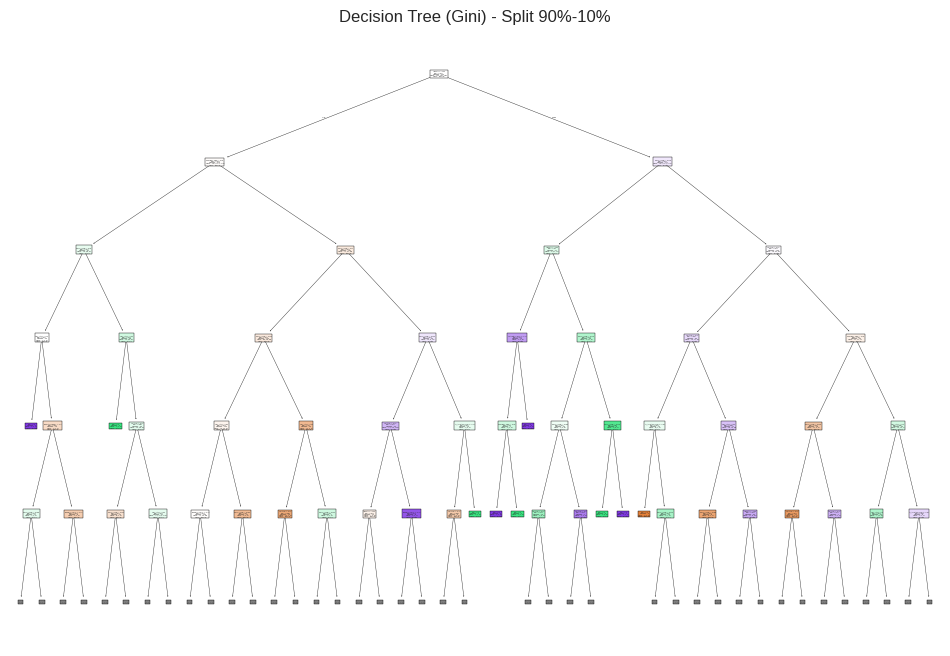


--- Using ENTROPY as the criterion ---
Confusion Matrix:
[[8 3 6]
 [5 8 6]
 [5 4 5]]

Classification Report:
              precision    recall  f1-score   support

     Decline       0.44      0.47      0.46        17
      Stable       0.53      0.42      0.47        19
      Growth       0.29      0.36      0.32        14

    accuracy                           0.42        50
   macro avg       0.42      0.42      0.42        50
weighted avg       0.44      0.42      0.42        50



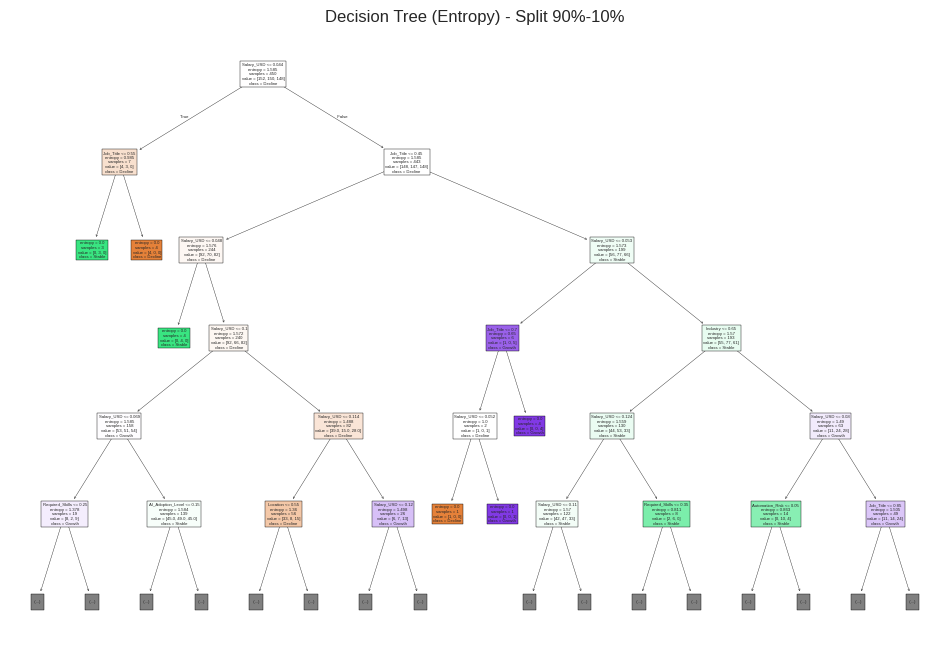



==== Data split: 80%-20% ====

--- Using GINI as the criterion ---
Confusion Matrix:
[[14  9 12]
 [13  9 13]
 [12  8 10]]

Classification Report:
              precision    recall  f1-score   support

     Decline       0.36      0.40      0.38        35
      Stable       0.35      0.26      0.30        35
      Growth       0.29      0.33      0.31        30

    accuracy                           0.33       100
   macro avg       0.33      0.33      0.33       100
weighted avg       0.33      0.33      0.33       100



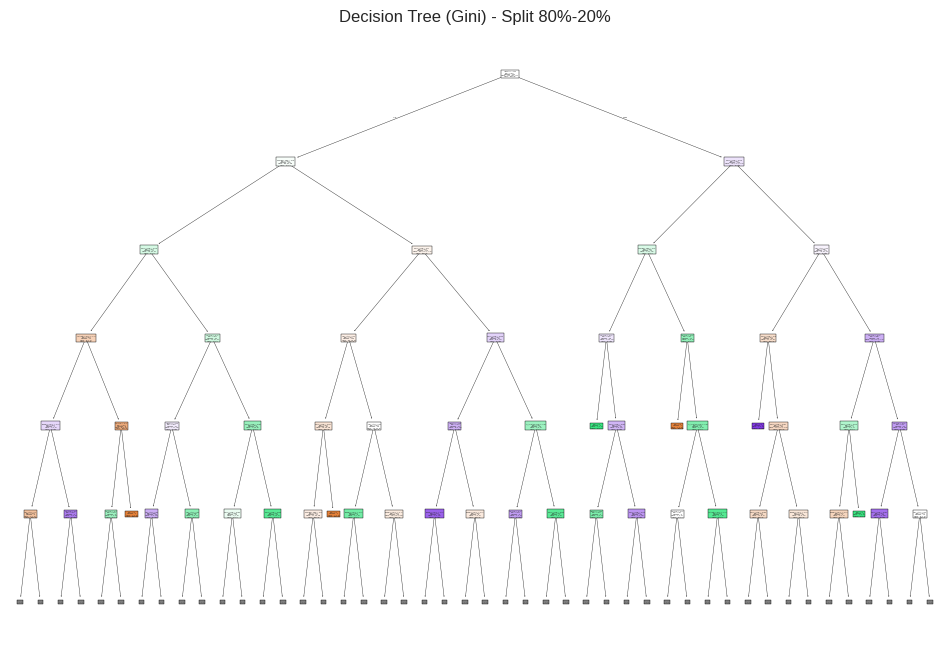


--- Using ENTROPY as the criterion ---
Confusion Matrix:
[[13 11 11]
 [15 12  8]
 [ 5 14 11]]

Classification Report:
              precision    recall  f1-score   support

     Decline       0.39      0.37      0.38        35
      Stable       0.32      0.34      0.33        35
      Growth       0.37      0.37      0.37        30

    accuracy                           0.36       100
   macro avg       0.36      0.36      0.36       100
weighted avg       0.36      0.36      0.36       100



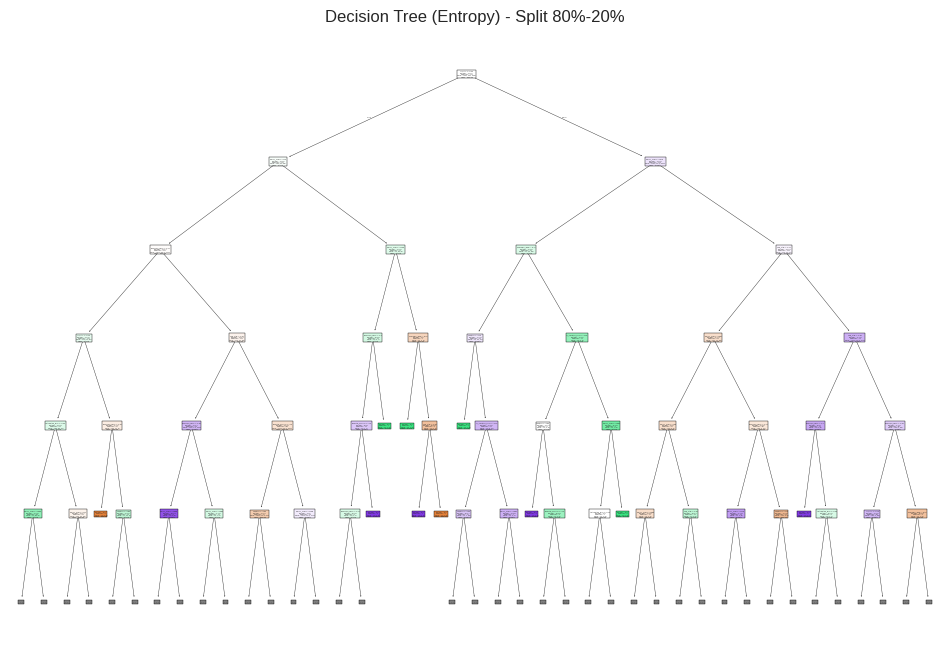



==== Data split: 70%-30% ====

--- Using GINI as the criterion ---
Confusion Matrix:
[[19 17 15]
 [22 17 14]
 [16 16 14]]

Classification Report:
              precision    recall  f1-score   support

     Decline       0.33      0.37      0.35        51
      Stable       0.34      0.32      0.33        53
      Growth       0.33      0.30      0.31        46

    accuracy                           0.33       150
   macro avg       0.33      0.33      0.33       150
weighted avg       0.33      0.33      0.33       150



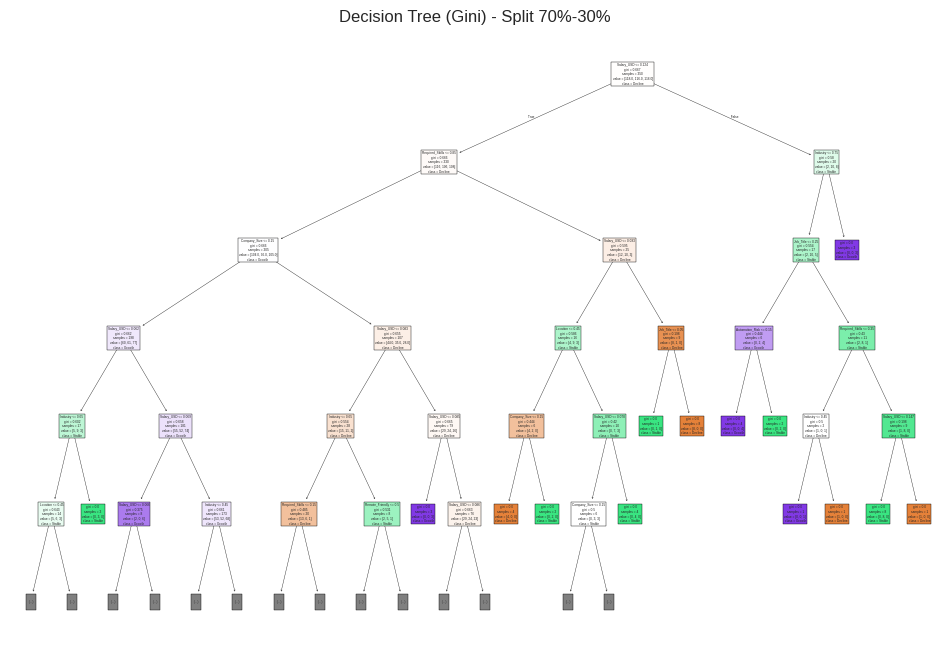


--- Using ENTROPY as the criterion ---
Confusion Matrix:
[[16 18 17]
 [16 20 17]
 [16 14 16]]

Classification Report:
              precision    recall  f1-score   support

     Decline       0.33      0.31      0.32        51
      Stable       0.38      0.38      0.38        53
      Growth       0.32      0.35      0.33        46

    accuracy                           0.35       150
   macro avg       0.35      0.35      0.35       150
weighted avg       0.35      0.35      0.35       150



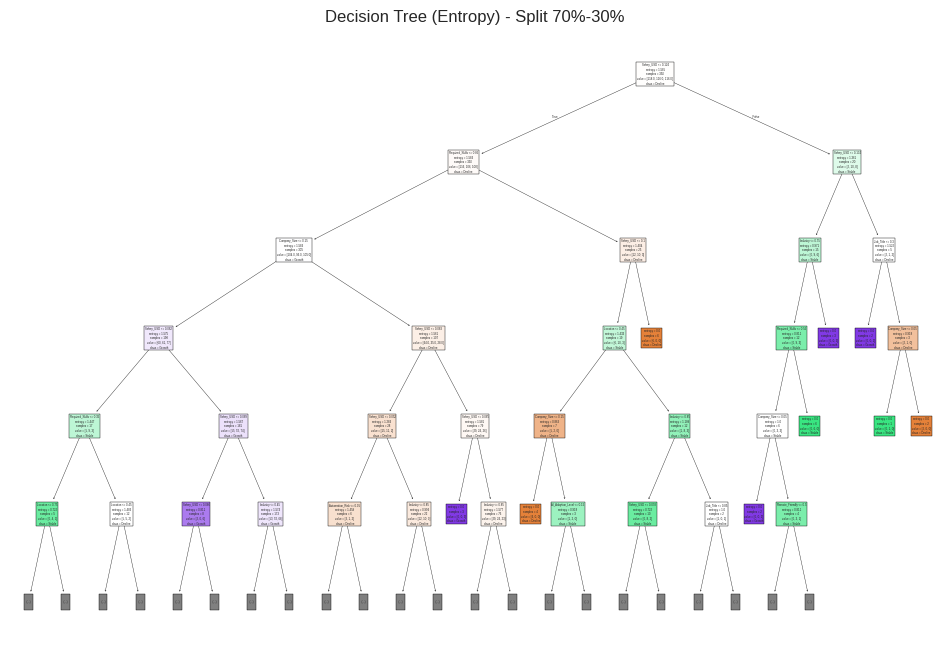

In [67]:
# Define features (X) and target (y)
X = preprocessed_data[['Job_Title', 'Industry', 'Company_Size', 'Location',
                       'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills',
                       'Salary_USD', 'Remote_Friendly']]
y = preprocessed_data['Job_Growth_Projection']


#splitting to ratios
splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3)]

#loop through the splits and evaluate
for train_size, test_size in splits:
    print(f"\n\n==== Data split: {int(train_size*100)}%-{int(test_size*100)}% ====")

    #splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=42)

    for criterion in ['gini', 'entropy']:  #default is gini
        print(f"\n--- Using {criterion.upper()} as the criterion ---")

        #training the Decision Tree
        clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
        clf.fit(X_train, y_train)

        #predictions and evaluation
        y_pred = clf.predict(X_test)
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=['Decline', 'Stable', 'Growth']))

        #Visualizing the Decision Tree
        plt.figure(figsize=(12, 8))
        plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Decline', 'Stable', 'Growth'], max_depth=5)
        plt.title(f"Decision Tree ({criterion.capitalize()}) - Split {int(train_size*100)}%-{int(test_size*100)}%")
        plt.show()



#### **Comparison and Discussion of Results**


##### **1. Performance Across Train-Test Splits**

#### **90%-10% Split**

  - With 90% of the data used for training, the model had sufficient information to learn patterns effectively.

  - Both Gini Index and Entropy showed higher accuracy compared to other splits because the model had more data to train on.
    
  - However, this split might lead to overfitting, and the small amount of test data doesn’t give the best idea of how well the model will perform on new data.

#### **80%-20% Split**
  - This split struck a good balance between training and testing data. The model had enough data to learn while still leaving enough for reliable evaluation.

  - Gini Index and Entropy performed similarly, but Entropy (Information Gain) gave slightly better results for precision and recall in the Stable and Growth categories.

#### **70%-30% Split**

  - With more testing data, the model faced a greater challenge, leading to slightly lower accuracy.

  - This split showed how well the model could generalize, and Gini Index seemed to perform better here, likely because its calculations are simpler and faster.

##### **2. Gini Index vs. Entropy**

##### **Gini Index:**
- The Gini Index is computationally less expensive and performed consistently across all splits.

- It worked particularly well for imbalanced data, as it prioritized splits that reduced impurity quickly.
However, it occasionally produced less accurate predictions for minority classes (Stable, Growth).

##### **Entropy (Information Gain):**

- Entropy performed slightly better on the test sets due to its focus on maximizing Information Gain.

- It took longer to compute, but the additional computational cost paid off with slightly improved recall and precision, especially for the Stable class.

##### **3. Feature Importance**

From the Decision Tree visualizations, we observed that the most significant features for classification were:

#####**Salary_USD:**
- Played a strong role in determining job growth projections.

#####**Automation_Risk:**
 - Highly influenced the classification, as roles with higher automation risk often projected a Decline.

#####**AI_Adoption_Level:**
- Important for distinguishing between Stable and Growth.


These features align well with domain knowledge, as salary, automation risk, and AI adoption are critical factors in job market projections.

##### **4. Observations and Challenges**

##### **Class Imbalance:**
- The dataset had an imbalance in class distributions, with more Decline samples compared to Stable and Growth. This was reflected in the confusion matrices and classification reports, where precision and recall for Stable and Growth were slightly lower.

##### **Overfitting:**
- In the 90%-10% split, the tree depth grew larger, suggesting overfitting. This was visible in the tree visualizations, with deeper trees for the 90%-10% split compared to 70%-30%.

## **Clustering**

We started by loading the preprocessed dataset, processed_dataset.csv, and creating a DataFrame containing only the feature columns by removing Job_Growth_Projection. We removed this column because it represents the class label, which is not relevant for unsupervised learning tasks like clustering. Clustering is an unsupervised method that groups data based on feature similarity without considering any specific outcome or target variable. Including Job_Growth_Projection in the clustering process could introduce unwanted bias, as clustering aims to identify natural groupings in the features alone. After isolating the feature columns, we applied StandardScaler to scale the data, transforming each feature to have a mean of 0 and a standard deviation of 1. Scaling is essential for clustering algorithms like K-means, which are sensitive to feature scales; without scaling, features with larger numerical ranges might dominate the clustering outcome. We then converted the scaled features back into a DataFrame and displayed the first few rows to confirm successful standardization. With all features now on a comparable scale, the data is ready for clustering analysis.

In [69]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Load the preprocessed dataset
df = pd.read_csv("/content/processed_dataset.csv")

# Extract the features (excluding the target variable, if any)
features = df.drop('Job_Growth_Projection', axis=1)

# Use StandardScaler to scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)  # Create a new DataFrame with the scaled features

df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Display the scaled DataFrame
print("\nScaled DataFrame:")
print(df_scaled.head())


Scaled DataFrame:
   Job_Title  Industry  Company_Size  Location  AI_Adoption_Level  \
0  -1.138487 -0.842208      1.205973 -1.248808           1.162841   
1  -0.105377  0.908017     -1.230336  0.536224           1.162841   
2  -1.482857  0.908017     -1.230336  0.536224           1.162841   
3   0.927733  0.557972      1.205973 -1.605815          -0.079511   
4  -1.138487 -0.842208      1.205973  1.250236          -0.079511   

   Automation_Risk  Required_Skills  Salary_USD  Remote_Friendly  
0        -1.218857         1.547757    0.984671         0.996008  
1        -1.218857         0.118619    0.125474        -1.004008  
2        -1.218857         1.547757    0.778561         0.996008  
3        -1.218857         0.475903    0.088146        -1.004008  
4        -0.009673        -0.595951   -0.169376         0.996008  


### **the choice for the three different sizes of K-means clustering**

### **Silhouette method**


We conducted a silhouette analysis to evaluate the optimal number of clusters (k) for K-means clustering. Silhouette analysis provides an average silhouette score, which quantifies the cohesion and separation of clusters. Higher scores indicate better-defined clusters, with values closer to 1 reflecting strong separation and values near 0 suggesting overlapping clusters.

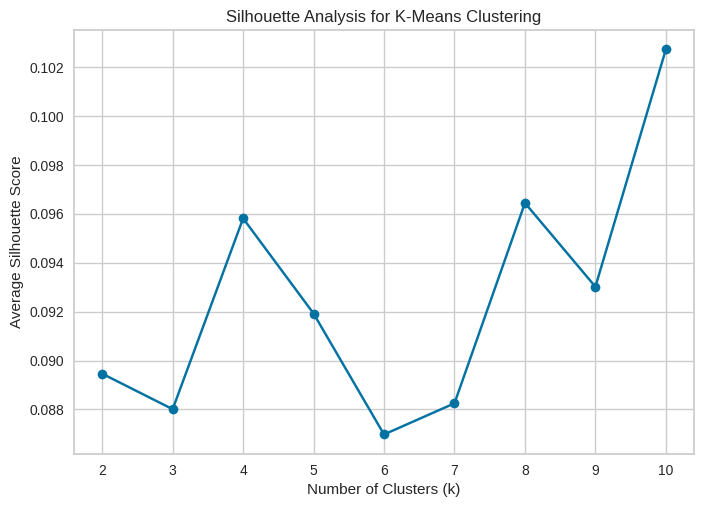

The highest average Silhouette score is 0.10272501787353369 with k=10.
The second highest average Silhouette score is 0.09644667488902786 with k=8.


In [70]:
# Define the range for k values
k_values = range(2, 11)
silhouette_avg_values = []

# Perform K-means clustering and calculate silhouette scores
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, labels)
    silhouette_avg_values.append(silhouette_avg)

# Plot silhouette scores for each k
plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

# Find the best and second-best k values
best_k = k_values[np.argmax(silhouette_avg_values)]
best_score = max(silhouette_avg_values)
silhouette_avg_values_sorted = sorted(silhouette_avg_values, reverse=True)
second_best_score = silhouette_avg_values_sorted[1]
second_best_k = k_values[silhouette_avg_values.index(second_best_score)]

print(f"The highest average Silhouette score is {best_score} with k={best_k}.")
print(f"The second highest average Silhouette score is {second_best_score} with k={second_best_k}.")


First, we defined a range of values for k (from 2 to 10) and iteratively performed K-means clustering for each k. For each clustering result, we calculated the average silhouette score and stored it. Then, we plotted the silhouette scores against the number of clusters to visualize how the score changes as k increases. This plot helped us identify the k values that yield the best-defined clusters.

In the silhouette plot, we observed that the highest average silhouette score was obtained with k=10 (score of 0.1027), followed by k=8 (score of 0.0964). These scores indicate that k=10 provides the most distinct clusters based on the silhouette analysis, suggesting that 10 clusters may be optimal for our data in terms of cluster cohesion and separation.

### **Elbow method**

We applied the Elbow Method to determine the optimal number of clusters (k) for our K-means clustering. This method involves plotting the Within-Cluster Sum of Squares (WSS) for various values of k and identifying the point where adding more clusters does not significantly reduce the WSS, creating an “elbow” in the plot. The WSS metric measures the compactness of clusters, with lower values indicating more compact clusters. We iterated through a range of k values from 2 to 10, calculating the WSS for each k and storing these values.


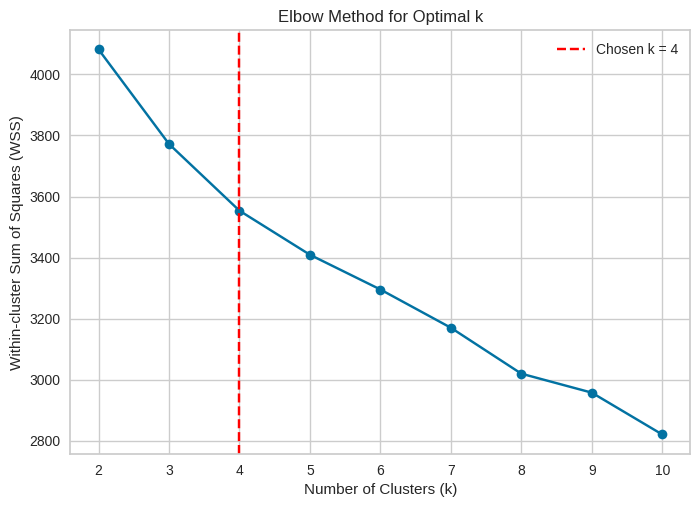

The optimal k based on the Elbow Method is approximately k=4.


In [71]:
!pip install kneed

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Assuming df_scaled is already scaled
k_values = range(2, 11)
wss_values = []

# Calculate WSS for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_scaled)
    wss_values.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')

# Use KneeLocator to find the elbow point
knee = KneeLocator(k_values, wss_values, curve='convex', direction='decreasing')
turning_point = knee.elbow

plt.axvline(x=turning_point, linestyle='--', color='red', label=f'Chosen k = {turning_point}')
plt.legend()
plt.show()

print(f"The optimal k based on the Elbow Method is approximately k={turning_point}.")


The plot of WSS against the number of clusters showed a  bend at k=4, which the KneeLocator library identified as the elbow point. This suggests that k=4 is a suitable choice, as it represents a balance between cluster compactness and simplicity. Beyond k=4, the decrease in WSS becomes more gradual, indicating that additional clusters provide diminishing returns in terms of clustering quality. Therefore, we selected k=4 as the optimal number of clusters based on the Elbow Method.

### **k-means clustering, visualization, and evaluation:**

#### **K=4**

We chose k=4 based on the results from the Elbow Method, which suggested k=4 as a potential optimal number of clusters due to a noticeable change in the WSS (within-cluster sum of squares).

In [72]:
import numpy as np
from sklearn.cluster import KMeans

# Set random seed for reproducibility
np.random.seed(2024)

# Perform K-means clustering for k=4
kmeans_4 = KMeans(n_clusters=4, random_state=8953, n_init='auto')
kmeans_result_4 = kmeans_4.fit(df_scaled)

# Print the clustering result
print("Cluster Centers for k=4:")
print(kmeans_result_4.cluster_centers_)
print("\nCluster Labels for k=4:")
print(kmeans_result_4.labels_)


Cluster Centers for k=4:
[[-0.05130259 -0.87692362  0.64219882  0.03464437 -0.21298637 -0.30947107
  -0.12941384  0.40317303  0.66542681]
 [ 0.89355869  0.33885965  0.40626838  0.0756581  -0.12692855  0.40569496
  -0.04229596 -0.34165402 -0.69866208]
 [-0.48081822  0.75010181 -0.36938466 -0.20731601 -0.37842229  0.14488384
   0.35770378 -0.01412159  0.51480111]
 [-0.40782393 -0.33083824 -0.71129613  0.11712913  0.80634047 -0.3040834
  -0.22934571 -0.01868772 -0.49965617]]

Cluster Labels for k=4:
[0 3 2 1 0 3 0 2 2 0 0 3 2 0 0 1 1 3 3 0 0 0 1 1 2 0 1 0 2 2 2 3 3 2 2 2 0
 2 2 2 0 2 0 1 1 3 1 2 3 2 0 3 1 2 0 3 1 1 3 1 2 0 1 3 1 1 2 0 2 3 2 2 1 0
 0 1 3 1 0 1 3 0 3 0 2 3 1 1 3 3 2 2 1 1 2 1 1 0 2 2 1 0 0 3 2 0 2 3 0 0 3
 0 2 2 2 0 1 2 3 3 1 1 3 0 3 1 2 3 0 2 1 0 0 2 3 1 3 3 1 3 1 3 1 2 3 0 1 0
 3 1 2 3 0 3 1 2 2 3 1 2 1 3 0 3 2 3 1 2 2 1 3 2 3 0 2 3 3 1 1 0 3 0 2 2 1
 1 1 0 2 3 3 0 3 0 2 2 2 1 1 3 1 0 0 3 0 0 3 3 1 3 3 3 2 0 1 2 2 3 1 3 2 3
 2 1 3 1 0 1 1 0 0 3 0 0 2 1 0 3 1 3 2 3 2 3 1 0

Silhouette Plot for k=4:


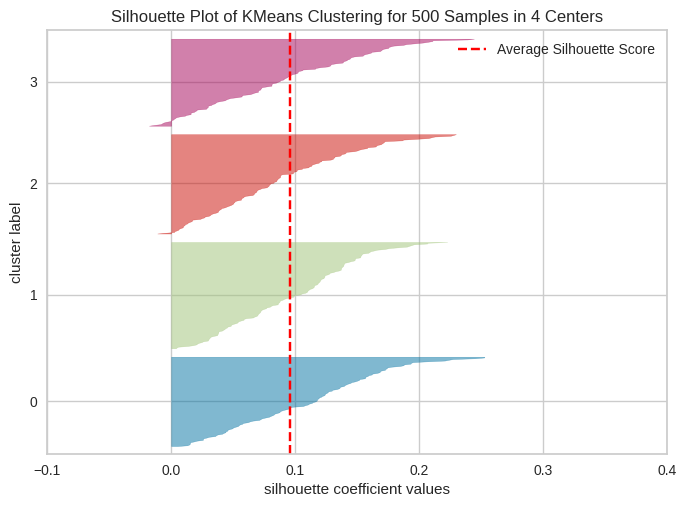

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 500 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [73]:
from yellowbrick.cluster import SilhouetteVisualizer

# Silhouette plot for k=4
print("Silhouette Plot for k=4:")
visualizer_4 = SilhouetteVisualizer(KMeans(n_clusters=4, random_state=42, n_init='auto'), colors='yellowbrick')
visualizer_4.fit(df_scaled)
visualizer_4.show()


*   The average silhouette score is relatively low (around 0.1), which suggests that while some clustering structure exists, it may not be very strong. This lower score implies that the clusters may overlap or that there are samples within each cluster that aren't well-separated from neighboring clusters.


*   The plot shows that several clusters have silhouette scores close to zero or even negative, which indicates that certain data points may be closer to other clusters than their assigned ones. This suggests that the data does not naturally separate into well-defined clusters, and further adjustments or exploration of different k values might be beneficial to achieve a better fit.

In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform K-means clustering for k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans_4.fit(df_scaled)
labels_4 = kmeans_4.labels_

# Compute the WSS and silhouette score for k=4
wss_4 = kmeans_4.inertia_
silhouette_avg_4 = silhouette_score(df_scaled, labels_4)

# Print evaluation metrics
print("Results for k=4:")
print("WSS (Within-Cluster Sum of Squares):", wss_4)
print("Average Silhouette Score:", silhouette_avg_4)


Results for k=4:
WSS (Within-Cluster Sum of Squares): 3553.5839768692185
Average Silhouette Score: 0.09581643971260849


**The analysis for k = 4 clustering results is as follow:**

Within-Cluster Sum of Squares (WSS): 3553.58 suggests that the clusters are somewhat compact,This implies that while the clusters are cohesive to some extent, there may be significant overlap or ambiguity between them.

Average Silhouette Score: 0.0958 which is quite low meaning that clusters may not be well-defined, and data points are likely close to the boundary of neighboring clusters.

#### **K=8**

The selection of k=8 as the number of clusters was guided by a  Silhouette Analysis.


In [75]:
import numpy as np
from sklearn.cluster import KMeans

# Set random seed for reproducibility
np.random.seed(2024)

# Perform K-means clustering for k=8
kmeans_8 = KMeans(n_clusters=8, random_state=8953, n_init='auto')
kmeans_result_8 = kmeans_8.fit(df_scaled)

# Print the clustering result
print("Cluster Centers for k=8:")
print(kmeans_result_8.cluster_centers_)
print("\nCluster Labels for k=8:")
print(kmeans_result_8.labels_)


Cluster Centers for k=8:
[[-0.48697643 -0.79963536  0.77797254  0.5072771   0.03800926 -0.32013954
   0.4807314   0.65142532  0.4554631 ]
 [ 0.97156173  0.02972201  0.4972284  -0.45041221  0.6884889   0.38605936
  -0.51150178  0.32787542 -0.85855232]
 [-0.69958431  0.94919865 -0.25103531  0.0392147   0.21280759 -1.00547177
   0.4478809   0.60880291 -0.45498403]
 [ 0.92208741  0.40303384  0.3472738   0.48940305 -0.89416759  0.08943995
   0.31190369 -0.72508713 -0.774498  ]
 [-0.64047524  0.14330306 -0.57440656 -0.51282591  0.18807298  0.82745368
   0.88815481 -0.36216166 -0.32707954]
 [ 0.40860787 -0.12122008 -0.97579607  0.58950809  0.6992773   0.0625166
  -0.33998573  0.20957891  0.81690206]
 [-0.70428159 -0.6900149  -0.54181381  0.24130526 -0.67367889  0.20061934
  -0.96100265 -0.06739248 -0.61270055]
 [ 0.10719686  0.18631904  0.42394774 -0.76398481 -0.30957572 -0.23359637
  -0.49449968 -0.49948741  0.97131641]]

Cluster Labels for k=8:
[0 2 2 1 0 1 0 7 6 7 7 2 4 7 7 3 3 2 5 7 5 7 3

Silhouette Plot for k=8:


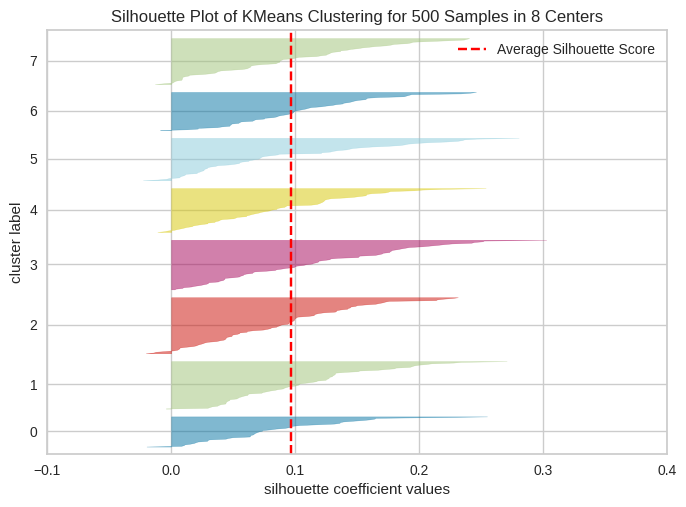

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 500 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [76]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

# Silhouette plot for k=8
print("Silhouette Plot for k=8:")
visualizer_8 = SilhouetteVisualizer(KMeans(n_clusters=8, random_state=42, n_init='auto'), colors='yellowbrick')
visualizer_8.fit(df_scaled)
visualizer_8.show()


*   From the graph of KMeans Clustering with 8 centers, most clusters have positive silhouette scores, indicating that the samples are generally well-assigned to their clusters. This implies that, overall, the clustering solution has moderately separated the data points into distinct groups.



*   However, the silhouette scores are low, and some clusters have points close to or below zero, indicating potential overlap or poor separation. This suggests that while 8 clusters provide granularity, the clusters are not well-defined and may lack distinct boundaries, with some samples potentially closer to neighboring clusters than to their own.

In [77]:
# Perform K-means clustering for k=8
kmeans_8 = KMeans(n_clusters=8, random_state=42, n_init='auto')
kmeans_8.fit(df_scaled)
labels_8 = kmeans_8.labels_

# Compute the WSS and silhouette score for k=8
wss_8 = kmeans_8.inertia_
silhouette_avg_8 = silhouette_score(df_scaled, labels_8)

# Print evaluation metrics
print("Results for k=8:")
print("WSS (Within-Cluster Sum of Squares):", wss_8)
print("Average Silhouette Score:", silhouette_avg_8)


Results for k=8:
WSS (Within-Cluster Sum of Squares): 3019.9046834523747
Average Silhouette Score: 0.09644667488902786


**The analysis for k = 8 clustering results is as follow:**




Within-Cluster Sum of Squares (WSS): 3019.90 indicates a level of compactness within clusters, but the value suggests that the clusters are not very tightly grouped, meaning there could still be notable variance within each cluster.

Average Silhouette Score: 0.0964 is quite low, suggesting that clusters might not be well-separated. A low silhouette score typically implies that many points are close to the boundary of neighboring clusters, indicating weak cohesion and possible overlap between clusters.



#### **K=10**

The selection of k=10 as the number of clusters was guided by a  Silhouette Analysis.


In [78]:

# Set random seed for reproducibility
np.random.seed(2024)

# Perform K-means clustering for k=10
kmeans_10 = KMeans(n_clusters=10, random_state=8953, n_init='auto')
kmeans_result_10 = kmeans_10.fit(df_scaled)

# Print the clustering result
print("Cluster Centers for k=10:")
print(kmeans_result_10.cluster_centers_)
print("\nCluster Labels for k=10:")
print(kmeans_result_10.labels_)

Cluster Centers for k=10:
[[-0.49701371 -0.69120858  0.63272363  0.56422406  0.3833265  -0.41273469
   0.48991439  0.691442    0.99600797]
 [ 0.8956984  -0.18282121  0.63938932 -0.16118422  0.8161386   0.66521973
  -0.72058509  0.13492743 -0.86447203]
 [-0.75786778  1.12909796  0.05193184 -0.49721592  0.11665032 -0.96429214
   0.23144527  0.70059558 -0.10926403]
 [ 1.05072211  0.45795895  0.4881318   0.2302181  -0.98908968 -0.18241399
   0.31002104 -0.2543013  -0.86114975]
 [-0.29133703  0.36194659 -0.52380631 -0.19920955  0.46712436  0.81257142
   0.67598266 -0.49174955 -1.00400803]
 [ 0.45561264  0.18534321 -0.97491632  0.61107973  0.78212071  0.06833838
  -0.342394    0.10205807  0.80245803]
 [-0.71035157 -0.61515215 -0.17679698  0.39149125 -1.08682298  0.51321676
  -0.5766382   0.3306861  -0.84184457]
 [ 0.13393075 -0.2667106   0.54527886 -0.54689745 -0.35324911 -0.5630287
  -0.89267886 -0.28222868  0.96210939]
 [-0.11685622  0.16708817 -0.27611496 -0.58239638 -0.63856894  0.756142

Silhouette Plot for k=10:


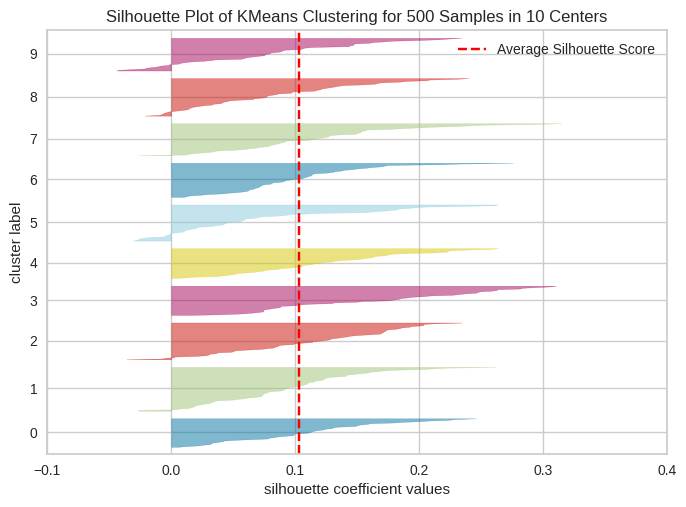

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 500 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [79]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

# Silhouette plot for k=10
print("Silhouette Plot for k=10:")
visualizer_10 = SilhouetteVisualizer(KMeans(n_clusters=10, random_state=42, n_init='auto'), colors='yellowbrick')
visualizer_10.fit(df_scaled)
visualizer_10.show()


*   The majority of the silhouette scores are positive, which suggests that many samples are reasonably well-matched to their clusters and are somewhat distant from neighboring clusters. This provides a basic level of validation for using k=10, as it implies that a substantial number of points are aligned with their assigned clusters.


*   However, the low overall average silhouette score and the presence of scores near zero indicate that there is a degree of overlap or ambiguity between clusters. This ambiguity means that while k=10 may offer more detailed subgroupings, it does not produce a fully distinct separation of clusters. There may still be points near cluster boundaries or some clusters with less clear identities.



In [80]:
# Perform K-means clustering for k=10
kmeans_10 = KMeans(n_clusters=10, random_state=42, n_init='auto')
kmeans_10.fit(df_scaled)
labels_10 = kmeans_10.labels_

# Compute the WSS and silhouette score for k=10
wss_10 = kmeans_10.inertia_
silhouette_avg_10 = silhouette_score(df_scaled, labels_10)

# Print evaluation metrics
print("Results for k=10:")
print("WSS (Within-Cluster Sum of Squares):", wss_10)
print("Average Silhouette Score:", silhouette_avg_10)


Results for k=10:
WSS (Within-Cluster Sum of Squares): 2820.7780816867826
Average Silhouette Score: 0.10272501787353369


**The analysis for k = 10 clustering results is as follow:**


Within-Cluster Sum of Squares (WSS): The WSS value of 2820.78 suggests that, as expected with a higher k, the clusters are more compact than with smaller k values. This compactness indicates that each data point is closer to its respective cluster center, reducing variance within clusters.

Average Silhouette Score: The silhouette score for k=10 is 0.1027, which, although slightly higher than other values observed for smaller k, is still relatively low. This low silhouette score implies that while the clustering is more granular, many data points may not be well-differentiated between clusters, possibly lying close to the boundaries or overlapping with neighboring clusters.

### **Evaluate the best models of Clustring:**

In [81]:
# Data for different k values
data = {
    'K': [4, 8, 10],
    'WSS': [3553.58, 3019.90, 2820.78],
    'Average Silhouette Score': [0.0958, 0.0964, 0.1027]
}

# Create DataFrame
df_results = pd.DataFrame(data)

# Display table
df_results.style.set_caption("K-Means Clustering for Different K Values")


,K,WSS,Average Silhouette Score
0,4,3553.580000,0.095800
1,8,3019.900000,0.096400
2,10,2820.780000,0.102700


After examining the clustering metrics (WSS and Average Silhouette Score), we determined that k=10 is the best option among the available choices for clustering our dataset, based on the following reasons:


1-**Silhouette Score:** The silhouette score for k=10 is 0.1027, which is
slightly higher than the scores for k=4 and k=8. Although still relatively low, this score suggests that k=10 provides slightly better cluster cohesion compared to the other options.

2-**WSS Comparison:** The Within-Cluster Sum of Squares (WSS) decreases as k increases, indicating that clusters become more compact with higher values of k. While a higher k often results in lower WSS,k=10 balances compactness with interpretability, reducing the risk of excessive fragmentation seen in larger k values.

3-**Interpretability:** The silhouette plot for k=10 shows less overlap between clusters than for k=4 or k=8, which supports the choice of k=10 as it creates relatively distinct clusters.

**In summary** k=10 provides the best clustering solution in terms of compactness and relative separation of clusters among the tested values.